# RANDOM THINGS

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from vizro import Vizro
import vizro.models as vm
from vizro.models.types import capture

# Vizro._reset()
gapminder = pd.read_csv('uni.csv', header=0, usecols=[
    "University Name", 
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
])

gapminder_1 = pd.DataFrame(dict(
    r=[82.2, 39.7, 92.9, 88.3, 87.4, 44.7],
    r_otago=[45, 35.6, 59.1, 75.8, 79.5, 24.6],
    r_massey=[30.1, 28.7, 49.2, 60.5, 85.1, 14],
    r_victoria=[42.8, 28.6, 71.6, 69.4, 70.7, 21.4],
    r_waikato=[19.1, 26.1, 46.4, 74.3, 55.1, 11.7],
    r_canterbury=[34.7, 28.6, 82.3, 62.4, 63, 27.3],
    r_lincoln=[8.2, 33.9, 40, 68.4, 20.2, 5],
    r_aut=[19.3, 23.8, 12.4, 84, 52.6, 11.2],
    theta=['Academic reputation', 'Teaching quality', 'Employment Outcomes', 'Research quality', 'International Research Network', 'Employer Reputation']
))

@capture("graph")
def radarchart(data_frame, r, theta, title=None, markers=None, hover_name=None, line_close=None, template=None): 
    fig_radar = px.line_polar(data_frame=data_frame, r=r, theta=theta, title=title, markers=markers, hover_name=hover_name, line_close=line_close, template=template)
    
    fig_radar.update_layout(
        legend=dict(
            font=dict(
                family="Georgia, serif",
                size=12,
            )
        ),
        annotations=[
            dict(
                xref='paper', 
                yref='paper',
                x=0.5, 
                y=-0.1,  # Position below the chart
                showarrow=False,
                text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings'>THE Rankings</a>",
                font=dict(
                    family="Georgia, serif",
                    size=12,
                ),
            )
        ]
    ) 
    
    fig_radar.update_traces(fill='toself')

    fig_radar.update_layout(
        font_family="Georgia, serif",
        title_font_family="Georgia, serif",
    )
    return fig_radar

def totalradarchart(): 
    fig_total = go.Figure()
    
    fig_total.add_trace(go.Scatterpolar(
      r=gapminder_1['r'],
      theta=gapminder_1['theta'],
      fill='toself',
      name='University of Auckland'
    ))

    fig_total.add_trace(go.Scatterpolar(
      r=gapminder_1['r_otago'],
      theta=gapminder_1['theta'],
      fill='toself',
      name='University of Otago'
    ))
    
    return fig_total


def create_metrics():
    """Function returns a page to show scores of different metrics on each university."""
    page_years = vm.Page(
        title="Universities' Scores in metrics",
        description="Discovering how different NZ universities are scored with different metrics",
        layout=vm.Layout(grid=[[0],]),
        components=[
            vm.Tabs(
                tabs=[
                    vm.Container(
                        title="Auckland",
                        layout=vm.Layout(grid=[[1,1],
                                               [0,0],
                                               [0,0],
                                               [0,0],
                                               [0,0],
                                               [0,0],]),
                        components=[
                            vm.Graph(
                                id="uoa",
                                figure=totalradarchart(),
                            ),
                            vm.Card(
                                text="""
                                ![](assets/images/uoa2.png#my-image2)

                                The University of Auckland is New Zealand’s leading university, located in the country’s largest city. 
                                
                                It offers a comprehensive range of programs and is known for its strong emphasis on research and innovation. 

                                 > ## WHAT DOES THIS MEAN? 

                                > - **Academic Reputation (82.2)**: The University of Auckland is known around the world for its high academic standards. You'll be able to learn from some of the greatest minds in the world.

                                > - **Employment Outcomes (92.9)**: you will have good job chances and exciting career options right after you graduate.

                                > - **Research Quality (88.3)**: At UOA, you can dive into cutting-edge research, where new projects and findings happen every day. You'll be a part of a university that challenges what people think they know.

                                > - **International Research Network (87.4)**: Work with the best experts in the world. Because UOA has strong international ties, you'll get a global view and useful training.  
                                
                                If you choose the University of Auckland, you'll be choosing a university that is highly regarded, has great job prospects, and does great study. 
                                You'll accomplish well in school and at work there, and you'll still be close to the exciting city life of Auckland. 🌟📚🌍

                                """,
                            ),
                        ],
                    ),
                    vm.Container(
                        title="Auckland",
                        layout=vm.Layout(grid=[[1, 0, 0]]),
                        components=[
                            vm.Graph(
                                id="uoa",
                                figure=radarchart(
                                    gapminder_1,
                                    r="r",
                                    theta="theta",
                                    title="University of Auckland",
                                    markers=True,
                                    hover_name="theta",
                                    line_close=True, 
                                    template="seaborn",
                                ),
                            ),
                            vm.Card(
                                text="""
                                ![](assets/images/uoa2.png#my-image2)

                                The University of Auckland is New Zealand’s leading university, located in the country’s largest city. 
                                
                                It offers a comprehensive range of programs and is known for its strong emphasis on research and innovation. 

                                 > ## WHAT DOES THIS MEAN? 

                                > - **Academic Reputation (82.2)**: The University of Auckland is known around the world for its high academic standards. You'll be able to learn from some of the greatest minds in the world.

                                > - **Employment Outcomes (92.9)**: you will have good job chances and exciting career options right after you graduate.

                                > - **Research Quality (88.3)**: At UOA, you can dive into cutting-edge research, where new projects and findings happen every day. You'll be a part of a university that challenges what people think they know.

                                > - **International Research Network (87.4)**: Work with the best experts in the world. Because UOA has strong international ties, you'll get a global view and useful training.  
                                
                                If you choose the University of Auckland, you'll be choosing a university that is highly regarded, has great job prospects, and does great study. 
                                You'll accomplish well in school and at work there, and you'll still be close to the exciting city life of Auckland. 🌟📚🌍

                                """,
                            ),
                        ],
                    ),
                    vm.Container(
                        title="Otago",
                        layout=vm.Layout(grid=[[1, 0, 0]]),
                        components=[
                            vm.Graph(
                                id="otago",
                                figure=radarchart(
                                    gapminder_1,
                                    r="r_otago",
                                    theta="theta",
                                    title="University of Otago",
                                    markers=True,
                                    hover_name="theta",
                                    line_close=True,
                                    template="seaborn"
                                ),
                            ),
                            vm.Card(
                                text="""
                                # ![](assets/images/otago.png#my-image3)
                                
                                The University of Otago is New Zealand’s oldest university, located in the scenic city of Dunedin. 
                                
                                It offers a rich variety of programs and is renowned for its vibrant campus life and strong research focus.
                                
                                > ### SO WHAT DOES THIS MEAN? 
                                
                                > - **Employment Outcomes (59.1)**: Otago graduates are highly sought after by employers, leading to strong job prospects and successful career paths right after graduation.
                                
                                > - **Research Quality (75.8)**: Engage in high-impact research at Otago, where students and faculty work on innovative projects that drive forward scientific and academic knowledge.
                                
                                > - **International Research Network (79.5)**: Otago boasts strong international collaborations, giving students the opportunity to participate in global research initiatives and broaden their academic horizons.
                                
                                Choosing the University of Otago means joining a university that values academic excellence, offers significant research opportunities, and fosters a supportive and dynamic student community. It's a place where you'll not only grow academically but also enjoy a vibrant and fulfilling university experience in a beautiful setting. 🌟📚🌏
                                """,
                            ),
                        ],
                    ),
                    vm.Container(
                        title="Massey",
                        layout=vm.Layout(grid=[[1, 0, 0]]),
                        components=[
                            vm.Graph(
                                id="massey",
                                figure=radarchart(
                                    gapminder_1,
                                    r="r_massey",
                                    theta="theta",
                                    title="Massey University",
                                    markers=True,
                                    hover_name="theta",
                                    line_close=True,
                                    template="seaborn"
                                ),
                            ),
                            vm.Card(
                                text="""
                                # ![](assets/images/massey.png#my-image4)
                                
                                ### Massey University
                                Massey University is renowned for its innovative teaching methods and extensive research programs, with campuses in Palmerston North, Albany, and Wellington.
                                
                                It offers a wide range of programs and emphasizes practical, hands-on learning experiences.
                                
                                > ### SO WHAT DOES THIS MEAN? 
                                
                                > - **International Research Network (85.1)**: Massey has an extensive international research network, allowing students to collaborate on global projects and gain international experience.
                                
                                > - **Research Quality (60.5)**: Engage in high-quality research at Massey, where innovative projects and discoveries are highly encouraged.
                                
                                > - **Employment Outcomes (49.2)**: Massey graduates are well-prepared for the workforce, with solid job prospects after graduation.
                                
                                Choosing Massey University means embracing innovation and benefiting from a global perspective, with numerous opportunities for international collaboration. 🌟🌐📚
                                """,
                            ),
                        ],
                    ),
                    vm.Container(
                        title="Victoria @ Wellington",
                        layout=vm.Layout(grid=[[1, 0, 0]]),
                        components=[
                            vm.Graph(
                                id="victoria",
                                figure=radarchart(
                                    gapminder_1,
                                    r="r_victoria",
                                    theta="theta",
                                    title="Victoria University of Wellington",
                                    markers=True,
                                    hover_name="theta",
                                    line_close=True,
                                    template="seaborn"
                                ),
                            ),
                            vm.Card(
                                text="""
                                # ![](assets/images/victoria.png#my-image5)
                                
                                ### Victoria University of Wellington
                                Victoria University of Wellington is celebrated for its strong emphasis on research and academic excellence. Located in New Zealand's capital, it offers unique opportunities for engagement with government and industry.
                                
                                It offers a diverse range of programs and is known for its vibrant campus life and strong community engagement.
                                
                                > ### SO WHAT DOES THIS MEAN? 
                                
                                > - **Employment Outcomes (71.6)**: Graduates from Victoria have strong employment prospects, with many finding successful careers shortly after graduation.
                                
                                > - **Research Quality (69.4)**: Victoria excels in research, providing students with opportunities to participate in cutting-edge projects.
                                
                                > - **International Research Network (70.7)**: Victoria's strong international connections mean students can participate in global research initiatives and gain a global perspective.
                                
                                Choosing Victoria University of Wellington means gaining access to excellent academic programs and strong career opportunities in the heart of New Zealand's capital. 🌟🏙️📚
                                """,
                            ),
                        ],
                    ),
                    vm.Container(
                        title="Waikato",
                        layout=vm.Layout(grid=[[1, 0, 0]]),
                        components=[
                            vm.Graph(
                                id="waikato",
                                figure=radarchart(
                                    gapminder_1,
                                    r="r_waikato",
                                    theta="theta",
                                    title="University of Waikato",
                                    markers=True,
                                    hover_name="theta",
                                    line_close=True,
                                    template="seaborn",
                                ),
                            ),
                            vm.Card(
                                text="""
                                # ![](assets/images/waikato.png#my-image6)
                                
                                ### University of Waikato
                                The University of Waikato, located in Hamilton, is known for its innovative approach to education and strong ties to the community.
                                
                                It offers a diverse range of programs and emphasizes research excellence and practical learning.
                                
                                > ### SO WHAT DOES THIS MEAN? 
                                
                                > - **Research Quality (74.3)**: Waikato excels in research, providing students with opportunities to participate in cutting-edge projects and innovations.
                                
                                > - **International Research Network (55.1)**: The university's global connections mean you'll have access to a diverse range of research opportunities and collaborations.
                                
                                Choosing the University of Waikato means joining a university that values research and practical experience. It's a place where you can engage in high-quality research while being part of a supportive and innovative community. 🌟🔬📚
                                """,
                            ),
                        ],
                    ),
                    vm.Container(
                        title="Canterbury",
                        layout=vm.Layout(grid=[[1, 0, 0]]),
                        components=[
                            vm.Graph(
                                id="canterbury",
                                figure=radarchart(
                                    gapminder_1,
                                    r="r_canterbury",
                                    theta="theta",
                                    title="University of Canterbury",
                                    markers=True,
                                    hover_name="theta",
                                    line_close=True,
                                    template="seaborn",
                                ),
                            ),
                            vm.Card(
                                text="""
                                # ![](assets/images/canterbury.png#my-image7)
                                
                               ### University of Canterbury
                                The University of Canterbury, located in Christchurch, is renowned for its strong engineering and science programs.
                                
                                It offers a wide range of academic programs and is committed to providing a high-quality education through research and practical learning.
                                
                                > ### SO WHAT DOES THIS MEAN? 
                                
                                > - **Employment Outcomes (82.3)**: Canterbury graduates are highly sought after by employers, ensuring strong job prospects and exciting career opportunities.
                                
                                > - **International Research Network (63)**: The university's international collaborations provide students with opportunities to engage in global research projects.
                                
                                Choosing the University of Canterbury means being part of a respected institution with excellent job prospects and strong international research connections. It's a place where you can thrive academically and professionally. 🌟🔧📚
                                """,
                            ),
                        ],
                    ),
                    vm.Container(
                        title="Lincoln",
                        layout=vm.Layout(grid=[[1, 0, 0]]),
                        components=[
                            vm.Graph(
                                id="lincoln",
                                figure=radarchart(
                                    gapminder_1,
                                    r="r_lincoln",
                                    theta="theta",
                                    title="Lincoln University",
                                    markers=True,
                                    hover_name="theta",
                                    line_close=True,
                                    template="seaborn",
                                ),
                            ),
                            vm.Card(
                                text="""
                                # ![](assets/images/lincoln.png#my-image8)
                                
                                ### Lincoln University
                                Lincoln University, located near Christchurch, is a specialist land-based university with a strong focus on agriculture and environmental science.
                                
                                It offers unique programs tailored to these fields and emphasizes research and practical learning.
                                
                                > ### SO WHAT DOES THIS MEAN? 
                                
                                > - **Research Quality (68.4)**: Lincoln excels in research, particularly in areas related to agriculture and environmental science, providing students with opportunities to contribute to significant discoveries.
                                
                                Choosing Lincoln University means gaining expertise in specialized fields with strong research support. It's a place where you can engage in high-quality research while being close to nature. 🌟🌱📚
                                """,
                            ),
                        ],
                    ),
                    vm.Container(
                        title="AUT",
                        layout=vm.Layout(grid=[[1, 0, 0]]),
                        components=[
                            vm.Graph(
                                id="aut",
                                figure=radarchart(
                                    gapminder_1,
                                    r="r_aut",
                                    theta="theta",
                                    title="AUT",
                                    markers=True,
                                    hover_name="theta",
                                    line_close=True,
                                    template="seaborn",
                                ),
                            ),
                            vm.Card(
                                text="""
                                # ![](assets/images/aut.png#my-image9)
                                
                                ### Auckland University of Technology (AUT)
                                Auckland University of Technology (AUT), located in Auckland, is known for its innovative teaching methods and strong industry connections.
                                
                                It offers a dynamic learning environment with a focus on practical skills and real-world experience.
                                
                                > ### SO WHAT DOES THIS MEAN? 
                                
                                > - **Research Quality (84)**: AUT's commitment to research excellence provides students with opportunities to engage in high-impact projects and innovations.
                                
                                > - **International Research Network (52.6)**: AUT's strong international connections mean you'll have access to a global perspective and valuable experience.
                                
                                Choosing AUT means embracing innovation and benefiting from strong industry ties. It's a place where you can receive a forward-thinking education and gain practical skills for your future career. 🌟💡📚
                                """,
                            ),
                        ],
                    ),
                ],
            )
        ]
    )
    return page_years

# dashboard = vm.Dashboard(
#     pages=[
#         create_metrics()
#     ],
#     navigation=vm.Navigation(
#         nav_selector=vm.NavBar(
#             items=[
#                 vm.NavLink(
#                     label="Rankings of subject field",
#                     pages=["Universities' Scores in metrics"],
#                     icon="Auto Stories",
#                 ),
#             ]
#         ),
#     ),
# )

# if not IS_JUPYTERLAB:
#     app = Vizro().build(dashboard)
#     server = app.dash.server
    
#     if __name__ == "__main__":  
#         app.run(port=8080)
# else:
#     Vizro(assets_folder="assets").build(dashboard).run(port=8082)


FileNotFoundError: [Errno 2] No such file or directory: 'uni.csv'

# Bar chart for rankings

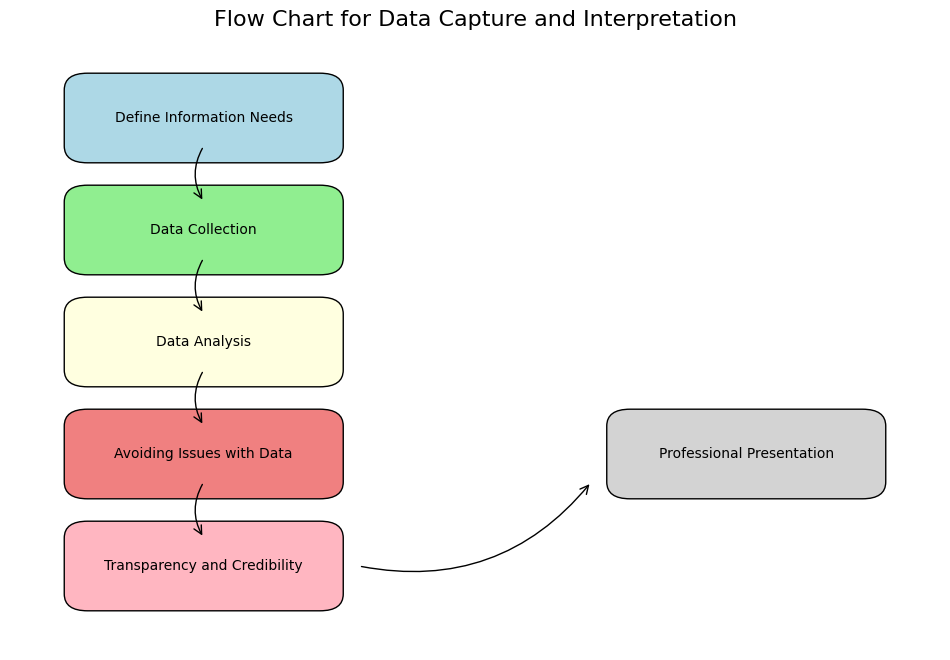

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(12, 8))

# Create a flowchart with boxes and arrows
def draw_box(ax, text, xy, box_style, facecolor):
    box = patches.FancyBboxPatch(xy, width=3, height=1, boxstyle=box_style, facecolor=facecolor, edgecolor='black')
    ax.add_patch(box)
    ax.text(xy[0] + 1.5, xy[1] + 0.5, text, ha='center', va='center', fontsize=10)

def draw_arrow(ax, start, end):
    arrow = patches.FancyArrowPatch(start, end, connectionstyle="arc3,rad=0.3", color='black', arrowstyle='->', mutation_scale=15)
    ax.add_patch(arrow)

# Boxes
boxes = [
    ("Define Information Needs", (1, 8), "round,pad=0.3", "lightblue"),
    ("Data Collection", (1, 6), "round,pad=0.3", "lightgreen"),
    ("Data Analysis", (1, 4), "round,pad=0.3", "lightyellow"),
    ("Avoiding Issues with Data", (1, 2), "round,pad=0.3", "lightcoral"),
    ("Transparency and Credibility", (1, 0), "round,pad=0.3", "lightpink"),
    ("Professional Presentation", (8, 2), "round,pad=0.3", "lightgrey")
]

# Arrows
arrows = [
    ((2.5, 8), (2.5, 7)),
    ((2.5, 6), (2.5, 5)),
    ((2.5, 4), (2.5, 3)),
    ((2.5, 2), (2.5, 1)),
    ((4.5, 0.5), (7.5, 2))
]

for text, xy, box_style, facecolor in boxes:
    draw_box(ax, text, xy, box_style, facecolor)

for start, end in arrows:
    draw_arrow(ax, start, end)

# Hide axes
ax.set_xlim(0, 12)
ax.set_ylim(-1, 10)
ax.axis('off')

plt.title("Flow Chart for Data Capture and Interpretation", fontsize=16)
plt.show()


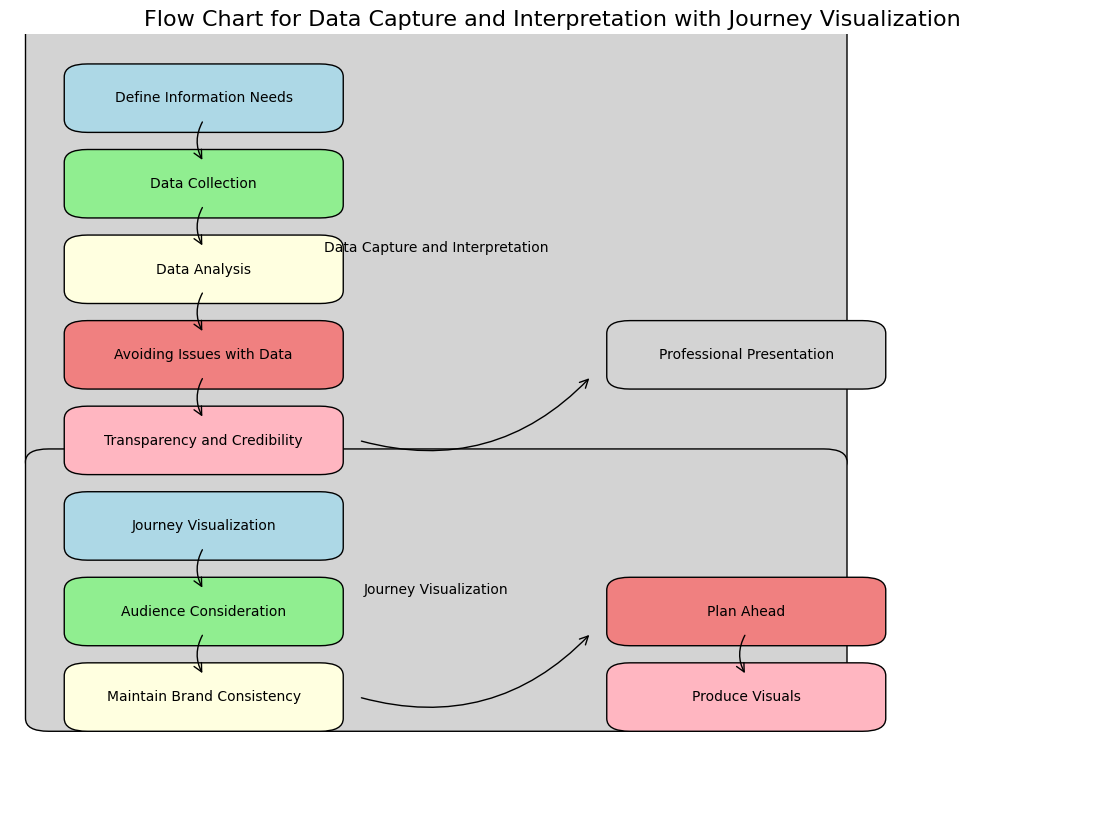

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(14, 10))

# Create a flowchart with boxes and arrows
def draw_box(ax, text, xy, box_style, facecolor, width=3, height=1):
    box = patches.FancyBboxPatch(xy, width=width, height=height, boxstyle=box_style, facecolor=facecolor, edgecolor='black')
    ax.add_patch(box)
    ax.text(xy[0] + width / 2, xy[1] + height / 2, text, ha='center', va='center', fontsize=10)

def draw_arrow(ax, start, end):
    arrow = patches.FancyArrowPatch(start, end, connectionstyle="arc3,rad=0.3", color='black', arrowstyle='->', mutation_scale=15)
    ax.add_patch(arrow)

# Data Capture and Interpretation Boxes
boxes = [
    ("Define Information Needs", (1, 14), "round,pad=0.3", "lightblue"),
    ("Data Collection", (1, 12), "round,pad=0.3", "lightgreen"),
    ("Data Analysis", (1, 10), "round,pad=0.3", "lightyellow"),
    ("Avoiding Issues with Data", (1, 8), "round,pad=0.3", "lightcoral"),
    ("Transparency and Credibility", (1, 6), "round,pad=0.3", "lightpink"),
    ("Professional Presentation", (8, 8), "round,pad=0.3", "lightgrey")
]

# Journey Visualization Boxes
journey_boxes = [
    ("Journey Visualization", (1, 4), "round,pad=0.3", "lightblue"),
    ("Audience Consideration", (1, 2), "round,pad=0.3", "lightgreen"),
    ("Maintain Brand Consistency", (1, 0), "round,pad=0.3", "lightyellow"),
    ("Plan Ahead", (8, 2), "round,pad=0.3", "lightcoral"),
    ("Produce Visuals", (8, 0), "round,pad=0.3", "lightpink")
]

# Arrows for Data Capture and Interpretation
arrows = [
    ((2.5, 14), (2.5, 13)),
    ((2.5, 12), (2.5, 11)),
    ((2.5, 10), (2.5, 9)),
    ((2.5, 8), (2.5, 7)),
    ((4.5, 6.5), (7.5, 8))
]

# Arrows for Journey Visualization
journey_arrows = [
    ((2.5, 4), (2.5, 3)),
    ((2.5, 2), (2.5, 1)),
    ((4.5, 0.5), (7.5, 2)),
    ((9.5, 2), (9.5, 1))
]

# Draw phase boxes
draw_box(ax, "Data Capture and Interpretation", (0.5, 6), "round,pad=0.3", "lightgrey", width=10, height=10)
draw_box(ax, "Journey Visualization", (0.5, 0), "round,pad=0.3", "lightgrey", width=10, height=6)

# Draw Data Capture and Interpretation Boxes
for text, xy, box_style, facecolor in boxes:
    draw_box(ax, text, xy, box_style, facecolor)

# Draw Journey Visualization Boxes
for text, xy, box_style, facecolor in journey_boxes:
    draw_box(ax, text, xy, box_style, facecolor)

# Draw Arrows
for start, end in arrows + journey_arrows:
    draw_arrow(ax, start, end)

# Hide axes
ax.set_xlim(0, 14)
ax.set_ylim(-2, 16)
ax.axis('off')

plt.title("Flow Chart for Data Capture and Interpretation with Journey Visualization", fontsize=16)
plt.show()


# LINE CHART FOR RANKINGS

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv('official.csv',
                 header=0,
                 usecols=["University Name", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

fig_line = px.line(df_long, x="Year", y="Ranking", color='University Name')

# Update layout for clarity
fig_line.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University'
)

fig_line.update_layout(
    title=go.layout.Title(
        text="<b>International NZ Uni Rankings</b><br><sup>QS Rankings from 2018 to 2025</sup>",
        font=dict(
            family="Courier New, monospace",
            size=25,
            color='#002D72'
        ),
        xref="paper",
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),

    xaxis_title="Metrics",
    yaxis_title="Ranking",
    legend=dict(
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
        )
    ),
  
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>",
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="black"
            )
        )
    ]
)


fig_line.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Read the dataset
df = pd.read_csv('data.csv', header=0, usecols=["University Name", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

# Create the area chart
fig_area = px.area(df_long, x="Year", y="Ranking", color='University Name')

# Update layout for clarity
fig_area.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University'
)

# Update layout for title and annotations
fig_area.update_layout(
    title={
        'text': "International QS rankings of New Zealand Universities",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
         xref="paper",
        'xanchor': 'center',
        'yanchor': 'auto'
    },
    xaxis_title="Year",
    yaxis_title="QS Ranking",
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Show the figure
fig_area.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

#creating the line chart
df = pd.read_csv('data.csv',
                 header=0,
                 usecols=["University Name", "N2018", "N2019", "N2020", "N2021", "N2022", "N2023", "N2024", "N2025"])

# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

fig_line = px.line(df_long, x="Year", y="Ranking", color='University Name')

# Update layout for clarity
fig_line.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University'
)
fig_line.update_layout(
    title=go.layout.Title(
        text="International QS rankings of New Zealand Universities<br><sup>Data from QS Top Universities from 2018 to 2025. (https://www.topuniversities.com)</sup>",
        xref="paper",
        x=0
    ),)


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Read the dataset
df = pd.read_csv('data.csv', usecols=[
    "University Name", 
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
])

# Filter the DataFrame to include only the row for "University of Auckland"
df_auckland = df[df['University Name'] == 'University of Auckland']

# Extract the relevant data for plotting
metrics = [
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
]

# Extract the values
values = df_auckland[metrics].values.flatten().tolist()

# Create the bar chart
fig = go.Figure(go.Bar(
    x=metrics, 
    y=values, 
    marker_color='darkslateblue',
    text=values,  # Add text labels
    textposition='auto'  # Automatically position text labels
))

# Update layout
fig.update_layout(
    title={
        'text': "University of Auckland Rankings",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Metrics",
    yaxis_title="Ranking",
  
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Show the figure
fig.show()


In [4]:
import pandas as pd
import plotly.graph_objects as go

# Read the dataset
df = pd.read_csv('data.csv', usecols=[
    "University Name", 
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
])

# Filter the DataFrame to include only the row for "University of Auckland"
df_auckland = df[df['University Name'] == 'University of Auckland']

# Extract the relevant data for plotting
metrics = [
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
]

# Extract the values
values = df_auckland[metrics].values.flatten().tolist()

# Create the horizontal bar chart
fig = go.Figure(go.Bar(
    y=metrics,  # Use metrics on y-axis for horizontal bars
    x=values,  # Use values on x-axis
    orientation='h',  # Set the orientation to horizontal
    marker_color='darkslateblue',
    text=values,  # Add text labels
    textposition='auto'  # Automatically position text labels
))

# Update layout
fig.update_layout(
    title={
        'text': "University of Auckland Rankings",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis_title="Metrics",
    xaxis_title="Ranking",
      # Reverse the x-axis to have higher rankings at the top
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Show the figure
fig.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

# radar chart

In [ ]:
fig.update_traces(fill='toself')

In [ ]:
import pandas as pd
import plotly.express as px

# Read the dataset
df = pd.read_csv('data.csv', header=0, usecols=[
    "University Name", 
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
])

# Filter the DataFrame to include only the row for "University of Auckland"
df_auckland = df[df['University Name'] == 'University of Auckland']

# Create the data for the radar chart
df_radar = pd.DataFrame(dict(
    r=df_auckland[[
        "Academic reputation (QS25)", 
        "Teaching quality (THE24)", 
        "Employment Outcomes (QS25)", 
        "Research quality (THE24)", 
        "International Research Network (QS25)", 
        "Employer Reputation (QS25)"
    ]].values.flatten().tolist(),
    theta=[
        'Academic reputation (QS25)', 
        'Teaching quality (THE24)', 
        'Employment Outcomes (QS25)', 
        'Research quality (THE24)', 
        'International Research Network (QS25)', 
        'Employer Reputation (QS25)'
    ]
))

# Create the radar chart
fig_radar = px.line_polar(df_radar, r='r', theta='theta', line_close=True)

# Update the traces to fill the area and set the fill color
fig_radar.update_traces(fill='toself', fillcolor='rgba(72, 61, 139, 0.5)', line_color='darkslateblue')

# Add data labels
fig_radar.update_traces(mode='lines+markers+text', text=df_radar['r'], textposition='top center')

# Update layout with title and annotations
fig_radar.update_layout(
    title={
        'text': "University of Auckland Rankings",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'auto'
    },
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0.2, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Show the figure
fig_radar.show()


EXTRA(for fun)

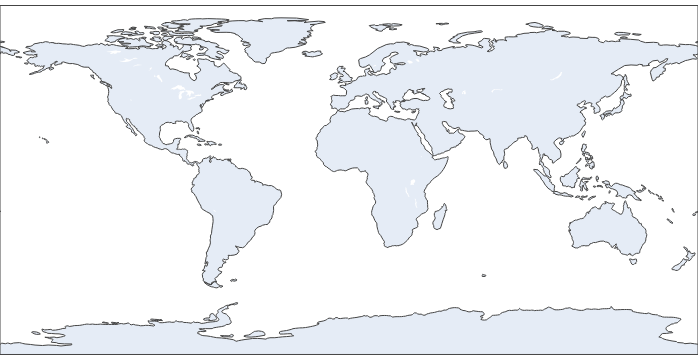

In [5]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure(go.Scattergeo())
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# LAYOUT

In [6]:
# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.


from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == "__main__":
    app.run_server(debug=True, port=8058)


In [7]:
import pandas as pd
import plotly.express as px

# Read the dataset
df = pd.read_csv('data.csv', header=0, usecols=["University Name", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

# Create the line chart
fig_line = px.line(df_long, x="Year", y="Ranking", color='University Name')

# Create the area chart
fig_area = px.area(df_long, x="Year", y="Ranking", color='University Name', line_group='University Name')

# Update the layout for both figures
fig_line.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University',
    title={
        'text': "International QS rankings of New Zealand Universities",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'auto'
    },
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Update the area chart layout to match the line chart


# Combine the line and area charts
fig_combined = go.Figure(data=fig_area.data + fig_line.data)

fig_combined.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University',
    title={
        'text': "International QS rankings of New Zealand Universities",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'auto'
    },
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)


# Show the combined figure
fig_combined.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

Maps

In [ ]:
import plotly.graph_objects as go

mapbox_access_token = open(".mapbox_token").read()

fig = go.Figure(go.Scattermapbox(
        lat=['45.5017'],
        lon=['-73.5673'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=14
        ),
        text=['Montreal'],
    ))

fig.update_layout(
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=45,
            lon=-73
        ),
        pitch=0,
        zoom=5
    )
)

fig.show()